# Import package


In [345]:
# install numpy
# install pandas
# install matplotlib
# install sklearn
# install seaborn
# install scikit-learn
# install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression 
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Làm sạch dữ liệu ( cleaning data)

### Tạo dataframe (Create dataframe)

In [312]:
data_frame_test = pd.read_csv("test.csv")
data_frame_train = pd.read_csv("train.csv")
data_frame = pd.concat([data_frame_test,data_frame_train],ignore_index = True)


In [313]:
data_frame

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Xóa cột không cần thiết (Drop columns)

In [314]:
data_frame = data_frame.sort_values(by = 'id')
data_frame = data_frame.drop(columns = 'id')
data_frame = data_frame.drop(columns='Unnamed: 0')
data_frame.reset_index(drop=True, inplace=True)


In [315]:
first_column = data_frame.iloc[:, 0]
print(first_column)

0           Male
1         Female
2           Male
3           Male
4         Female
           ...  
129875      Male
129876      Male
129877      Male
129878      Male
129879    Female
Name: Gender, Length: 129880, dtype: object


### Xử lí dữ liệu trùng (Duplicate Data)

In [316]:
print(data_frame.duplicated().sum())
data_frame.drop_duplicates(inplace=True)
data_frame

0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,2,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,4,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
129877,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
129878,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,1,...,3,4,5,5,3,4,3,31,22.0,satisfied


### Xử lí dữ liệu thiếu (Missing Data)

In [317]:

print(data_frame.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [318]:

temp = np.round(data_frame['Arrival Delay in Minutes'].mean(),2)

data_frame['Arrival Delay in Minutes'].fillna(temp,inplace = True)


C:\Users\abc\AppData\Local\Temp\ipykernel_9544\592716239.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['Arrival Delay in Minutes'].fillna(temp,inplace = True)


In [319]:
data_frame.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [320]:
data_frame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,2,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,4,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
129877,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
129878,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,1,...,3,4,5,5,3,4,3,31,22.0,satisfied


### Xử lí ngoại lai sử dụng IQR (data model)


In [321]:
df_copy_ol = data_frame.copy()

n_columns = df_copy_ol.select_dtypes(include = 'number')
for column in n_columns.columns:
    G1 = df_copy_ol[column].quantile(0.25)
    G3 = df_copy_ol[column].quantile(0.75)
    IQR = G3 - G1
    lower_limit = G1 - 1.5*IQR
    upper_limit = G3 + 1.5*IQR
    df_copy_ol = df_copy_ol[(df_copy_ol[column] > lower_limit) & (df_copy_ol[column] < upper_limit)]
    outliers = len(data_frame) - len(df_copy_ol)
    print(f'Columns {column}: remove {outliers} outliers')
df_copy_ol

Columns Age: remove 0 outliers
Columns Flight Distance: remove 2864 outliers
Columns Inflight wifi service: remove 2864 outliers
Columns Departure/Arrival time convenient: remove 2864 outliers
Columns Ease of Online booking: remove 2864 outliers
Columns Gate location: remove 2864 outliers
Columns Food and drink: remove 2864 outliers
Columns Online boarding: remove 2864 outliers
Columns Seat comfort: remove 2864 outliers
Columns Inflight entertainment: remove 2864 outliers
Columns On-board service: remove 2864 outliers
Columns Leg room service: remove 2864 outliers
Columns Baggage handling: remove 2864 outliers
Columns Checkin service: remove 18702 outliers
Columns Inflight service: remove 18706 outliers
Columns Cleanliness: remove 18706 outliers
Columns Departure Delay in Minutes: remove 34383 outliers
Columns Arrival Delay in Minutes: remove 47299 outliers


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
6,Male,Loyal Customer,43,Business travel,Business,1963,3,3,3,3,...,5,5,5,5,4,5,4,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129874,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129875,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,2,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,4,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied


In [322]:
for i in data_frame.columns:
    print(data_frame[i].max(), data_frame[i].min())

Male Female
disloyal Customer Loyal Customer
85 7
Personal Travel Business travel
Eco Plus Business
4983 31
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 1
5 0
5 0
5 0
1592 0
1584.0 0.0
satisfied neutral or dissatisfied


In [323]:
df_copy_ol.shape

(82581, 23)

In [324]:
df_copy_ol.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

### Rời rạc hóa dữ liệu

In [325]:
data_frame.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [326]:
n_columns.dtypes

Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: object

In [327]:
df_copy_ol

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
6,Male,Loyal Customer,43,Business travel,Business,1963,3,3,3,3,...,5,5,5,5,4,5,4,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129874,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129875,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,2,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,4,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied


In [328]:
discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'uniform')
df_copy_ol[n_columns.columns] = discretizer.fit_transform(df_copy_ol[n_columns.columns])

c:\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [329]:
df_copy_ol

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,2.0,Business travel,Business,1.0,3.0,3.0,3.0,3.0,...,4.0,2.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,neutral or dissatisfied
2,Male,Loyal Customer,2.0,Business travel,Business,1.0,4.0,4.0,4.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,4.0,0.0,0.0,satisfied
3,Male,Loyal Customer,2.0,Business travel,Business,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0,0.0,satisfied
4,Female,Loyal Customer,2.0,Business travel,Business,4.0,3.0,3.0,3.0,3.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,0.0,satisfied
6,Male,Loyal Customer,2.0,Business travel,Business,2.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,Female,Loyal Customer,1.0,Personal Travel,Eco Plus,0.0,4.0,2.0,4.0,4.0,...,3.0,0.0,4.0,2.0,3.0,3.0,3.0,0.0,0.0,neutral or dissatisfied
129874,Female,Loyal Customer,3.0,Personal Travel,Eco Plus,0.0,3.0,4.0,3.0,4.0,...,4.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,neutral or dissatisfied
129875,Male,Loyal Customer,1.0,Personal Travel,Eco Plus,0.0,4.0,4.0,4.0,2.0,...,4.0,4.0,4.0,3.0,3.0,4.0,4.0,0.0,1.0,neutral or dissatisfied
129876,Male,Loyal Customer,2.0,Personal Travel,Eco Plus,0.0,3.0,4.0,3.0,4.0,...,2.0,4.0,4.0,4.0,4.0,3.0,2.0,0.0,0.0,neutral or dissatisfied


### Chuyển đổi kiểu object thành Dataframe

In [330]:
o_columns = df_copy_ol.select_dtypes(include = 'object')
for column in o_columns:
    df_copy_ol[column] = LabelEncoder().fit_transform(df_copy_ol[column])
df_copy_ol

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,2.0,0,0,1.0,3.0,3.0,3.0,3.0,...,4.0,2.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,0
2,1,0,2.0,0,0,1.0,4.0,4.0,4.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,4.0,0.0,0.0,1
3,1,0,2.0,0,0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0,0.0,1
4,0,0,2.0,0,0,4.0,3.0,3.0,3.0,3.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,0.0,1
6,1,0,2.0,0,0,2.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,0,0,1.0,1,2,0.0,4.0,2.0,4.0,4.0,...,3.0,0.0,4.0,2.0,3.0,3.0,3.0,0.0,0.0,0
129874,0,0,3.0,1,2,0.0,3.0,4.0,3.0,4.0,...,4.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,0
129875,1,0,1.0,1,2,0.0,4.0,4.0,4.0,2.0,...,4.0,4.0,4.0,3.0,3.0,4.0,4.0,0.0,1.0,0
129876,1,0,2.0,1,2,0.0,3.0,4.0,3.0,4.0,...,2.0,4.0,4.0,4.0,4.0,3.0,2.0,0.0,0.0,0


In [331]:
df_copy_ol = df_copy_ol.reset_index(drop = True)
df_copy_ol.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,2.0,0,0,1.0,3.0,3.0,3.0,3.0,...,4.0,2.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,0
1,1,0,2.0,0,0,1.0,4.0,4.0,4.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,4.0,0.0,0.0,1
2,1,0,2.0,0,0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0,0.0,1
3,0,0,2.0,0,0,4.0,3.0,3.0,3.0,3.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,0.0,1
4,1,0,2.0,0,0,2.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1
5,0,0,3.0,0,0,1.0,4.0,3.0,4.0,4.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,1.0,1
6,1,0,2.0,0,0,3.0,4.0,1.0,1.0,1.0,...,4.0,3.0,4.0,3.0,1.0,3.0,3.0,0.0,0.0,0
7,0,0,1.0,0,0,3.0,2.0,2.0,4.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0,0.0,1
8,0,1,1.0,0,0,1.0,1.0,1.0,1.0,3.0,...,2.0,1.0,4.0,2.0,1.0,3.0,2.0,0.0,2.0,0
9,1,0,2.0,1,1,1.0,2.0,4.0,2.0,4.0,...,2.0,2.0,3.0,4.0,1.0,4.0,2.0,0.0,0.0,0


### Chia dữ liệu

In [332]:
x = df_copy_ol.drop(columns = 'satisfaction')
y = df_copy_ol['satisfaction']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
df_copy_ol.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,2.0,0,0,1.0,3.0,3.0,3.0,3.0,...,4.0,2.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,0
1,1,0,2.0,0,0,1.0,4.0,4.0,4.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,4.0,0.0,0.0,1
2,1,0,2.0,0,0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0,0.0,1
3,0,0,2.0,0,0,4.0,3.0,3.0,3.0,3.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,0.0,1
4,1,0,2.0,0,0,2.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1
5,0,0,3.0,0,0,1.0,4.0,3.0,4.0,4.0,...,3.0,2.0,4.0,2.0,1.0,2.0,4.0,0.0,1.0,1
6,1,0,2.0,0,0,3.0,4.0,1.0,1.0,1.0,...,4.0,3.0,4.0,3.0,1.0,3.0,3.0,0.0,0.0,0
7,0,0,1.0,0,0,3.0,2.0,2.0,4.0,2.0,...,4.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0,0.0,1
8,0,1,1.0,0,0,1.0,1.0,1.0,1.0,3.0,...,2.0,1.0,4.0,2.0,1.0,3.0,2.0,0.0,2.0,0
9,1,0,2.0,1,1,1.0,2.0,4.0,2.0,4.0,...,2.0,2.0,3.0,4.0,1.0,4.0,2.0,0.0,0.0,0


### Chuẩn hóa dữ liệu 

In [333]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Tập huấn dữ liệu 

In [334]:
X = df_copy_ol.drop('satisfaction', axis=1) 
y = df_copy_ol['satisfaction']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Trực quan hóa dữ liệu (Data Visualization)

## Tính toán số liệu thống kê cơ bản (Calculate basic statistics )

In [189]:
data_frame.select_dtypes(include= 'number').describe().T


,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [190]:
data_frame.select_dtypes(include= 'object').describe().T

,count,unique,top,freq
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
satisfaction,129880,2,neutral or dissatisfied,73452


## Phân bố của từng đối tượng (Distribution of each object)

### Gener, Customer Type, Type of Travel, Class, Satisfaction

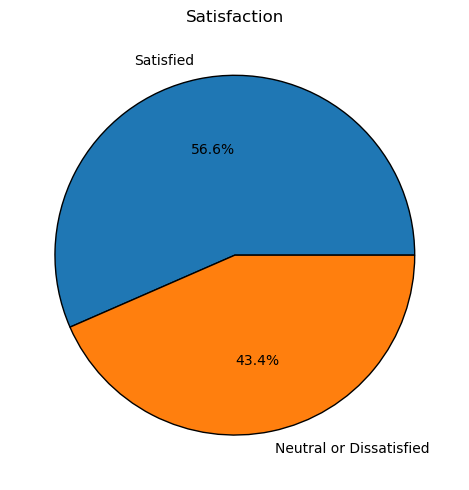

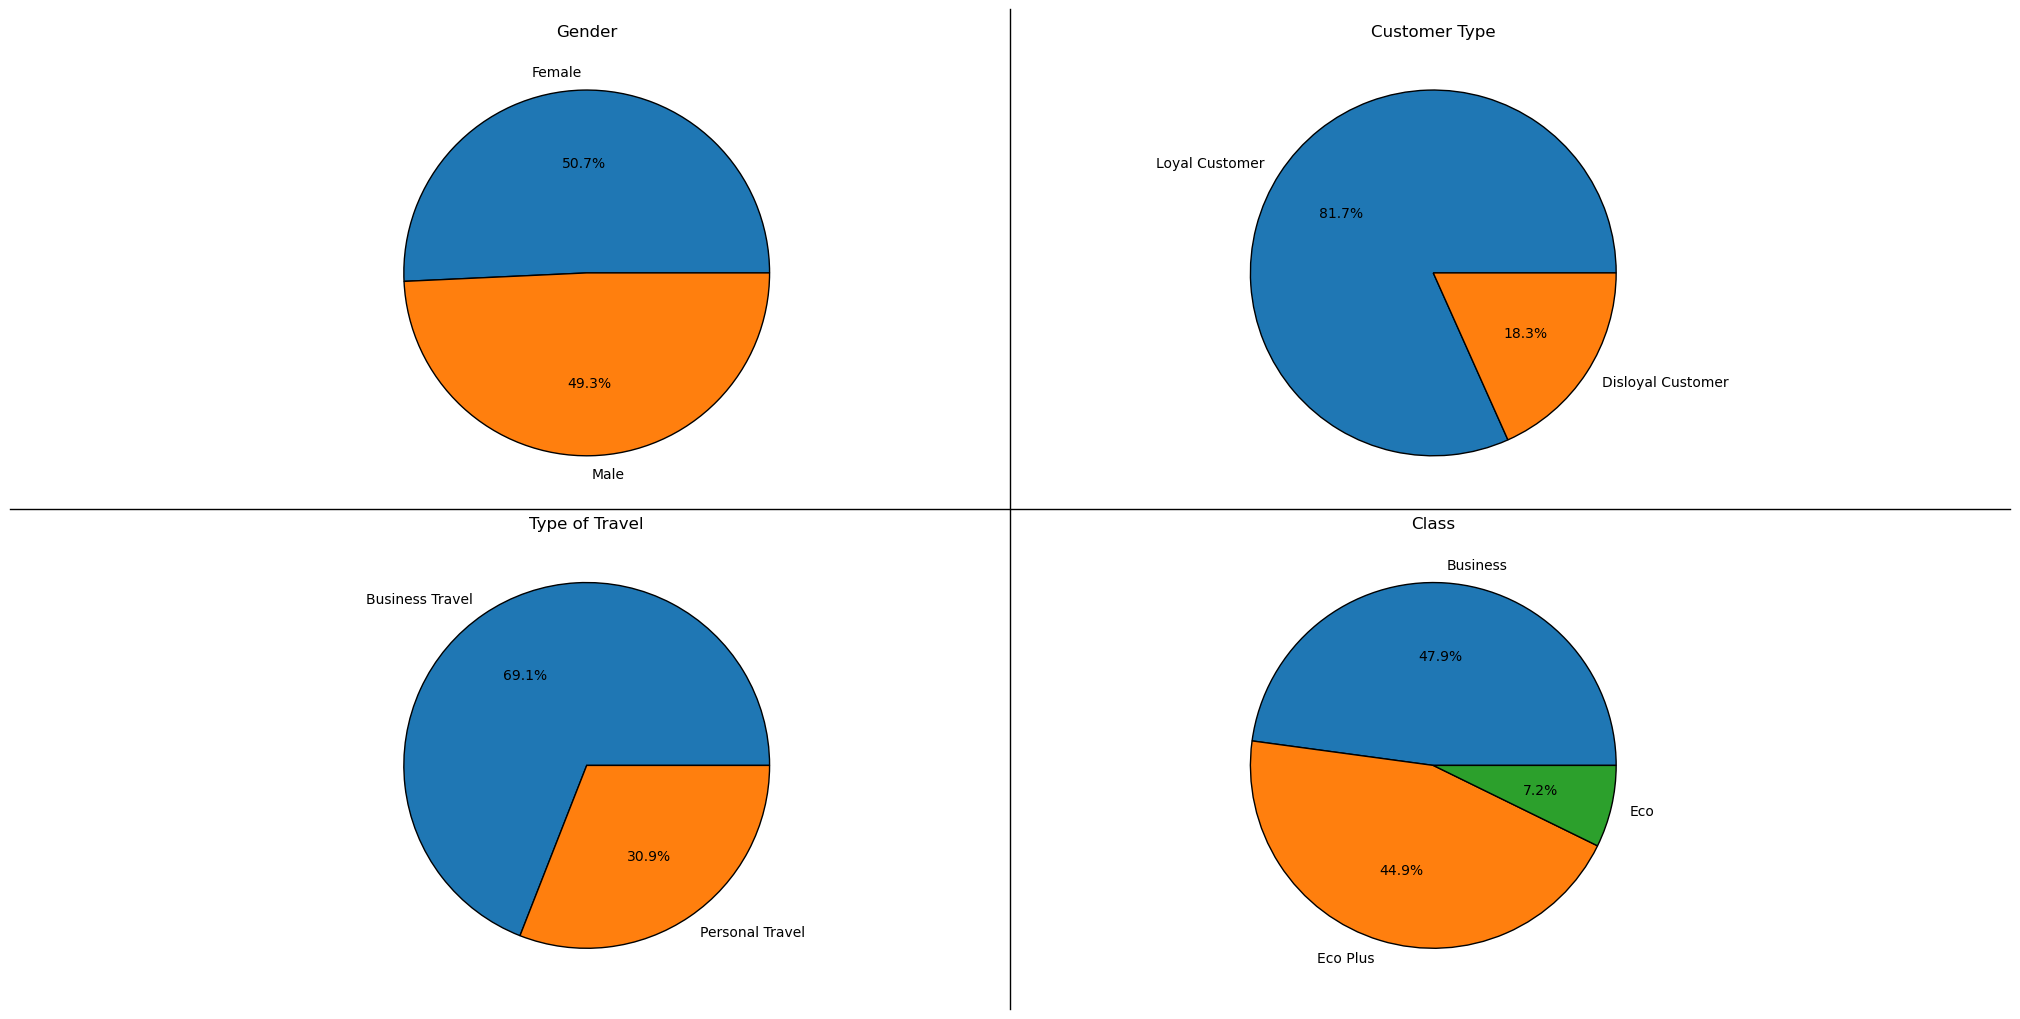

In [191]:
# Pie chart for Satisfaction
fig, ax = plt.subplots(figsize=(20, 5))
ax.pie(
    data_frame['satisfaction'].value_counts(),
    labels=['Satisfied', 'Neutral or Dissatisfied'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax.set_title("Satisfaction")
plt.tight_layout(rect=[0, 0, 1, 1])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color="black", linewidth=1, transform=fig.transFigure)) 
fig.add_artist(plt.Line2D([0, 1], [0.5, 0.5], color="black", linewidth=1, transform=fig.transFigure))  
# Pie chart for Gender
ax1.pie(
    data_frame['Gender'].value_counts(),
    labels=['Female', 'Male'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax1.set_title("Gender")

# Pie chart for Customer Type
ax2.pie(
    data_frame['Customer Type'].value_counts(),
    labels=['Loyal Customer', 'Disloyal Customer'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax2.set_title("Customer Type")

# Pie chart for Type of Travel
ax3.pie(
    data_frame['Type of Travel'].value_counts(),
    labels=['Business Travel', 'Personal Travel'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax3.set_title("Type of Travel")

# Pie chart for Class
ax4.pie(
    data_frame['Class'].value_counts(),
    labels=['Business', 'Eco Plus', 'Eco'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax4.set_title("Class")
plt.tight_layout(rect=[0, 0, 1, 1])

### Flight Distance,Departure Delay in Minutes, Arrival Delay in Minutes, 

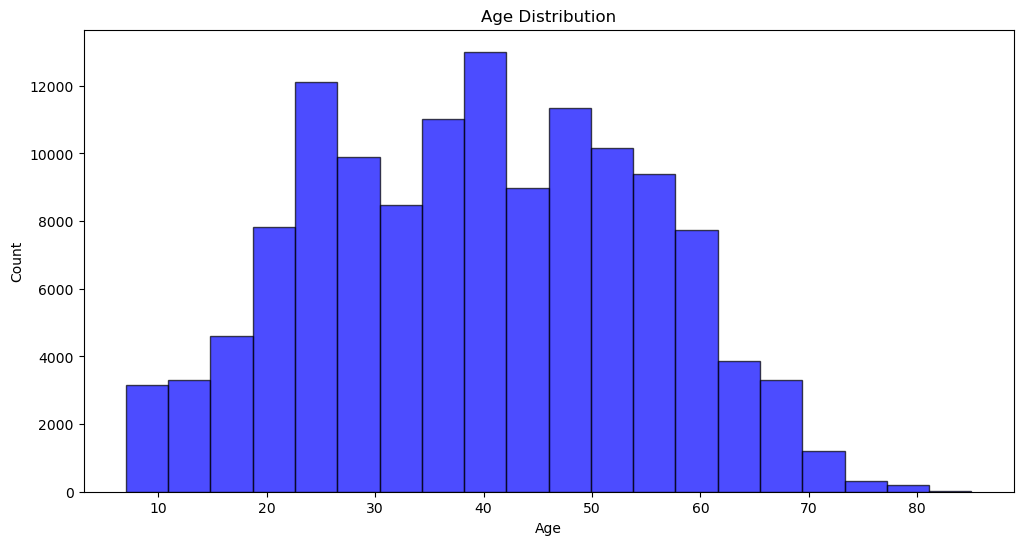

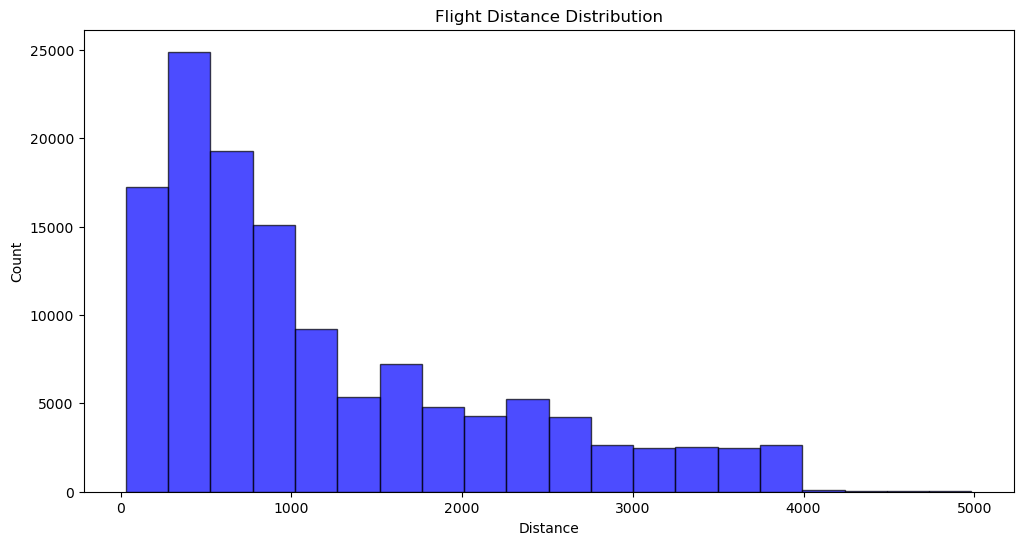

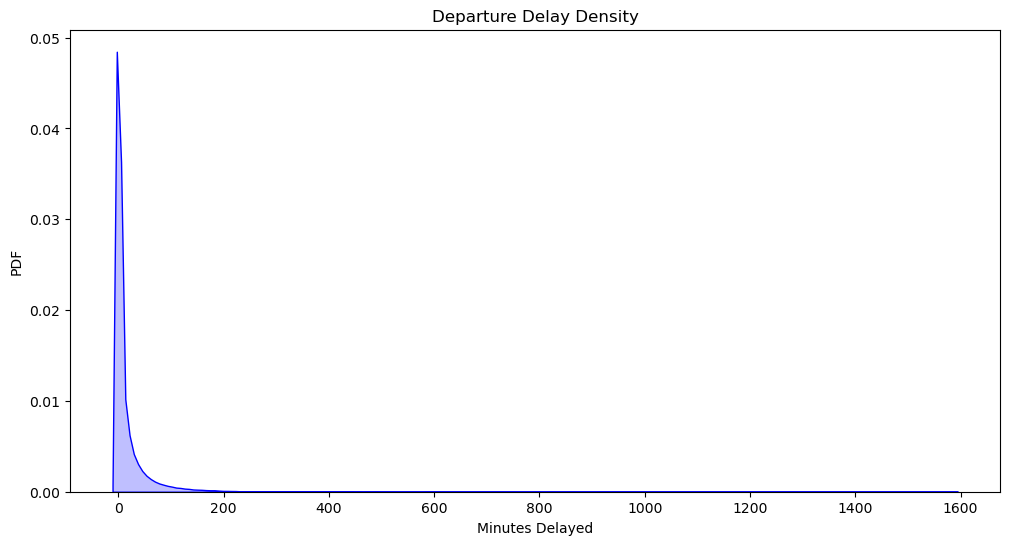

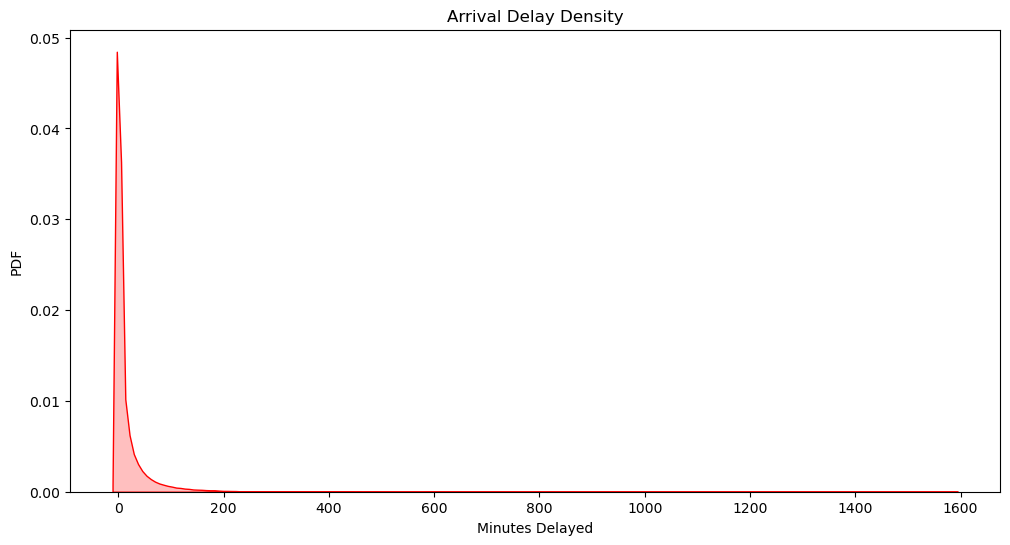

<Figure size 640x480 with 0 Axes>

In [192]:
# Histogram plot for Age
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_frame['Age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()
# Histogram plot for Flight Distance
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_frame['Flight Distance'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Flight Distance Distribution")
ax.set_xlabel("Distance")
ax.set_ylabel("Count")
plt.show()

# Line plot for Departure Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_frame['Arrival Delay in Minutes'], fill=True, color='blue', ax=ax)
ax.set_title("Departure Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
plt.show()

# Line plot for Arrival Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_frame['Arrival Delay in Minutes'], fill=True, color='red', ax=ax)
ax.set_title("Arrival Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
plt.show()
plt.tight_layout()
plt.show()

### Sự phân bố đánh giá của các dịch vụ (barh)

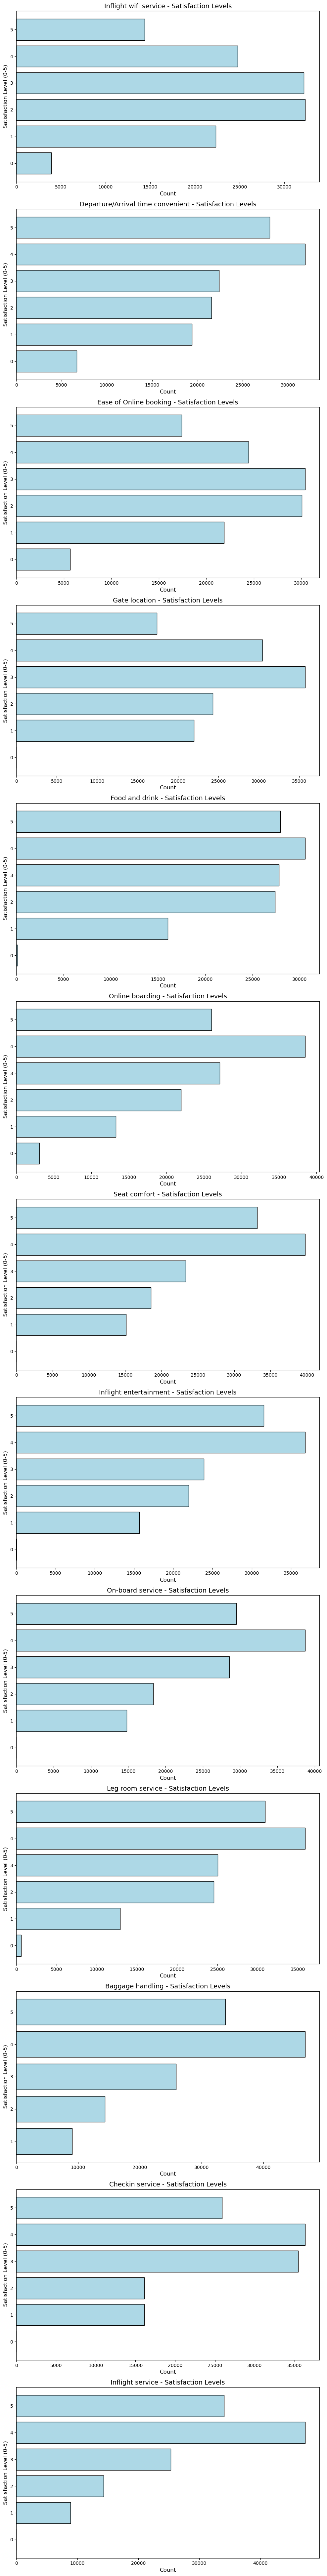

In [193]:
columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service'
]

# Tạo subplots để vẽ từng biểu đồ bar riêng biệt
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 6 * len(columns)))

# Vẽ từng biểu đồ bar cho mỗi dịch vụ
for i, col in enumerate(columns):
    axes[i].barh(data_frame[col].value_counts().sort_index().index, 
                 data_frame[col].value_counts().sort_index(), 
                 color='lightblue', edgecolor='black')
    axes[i].set_title(f'{col} - Satisfaction Levels', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel('Satisfaction Level (0-5)', fontsize=12)

# Đặt khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

### Sự phân bố đánh giá của các dịch vụ (boxplot)

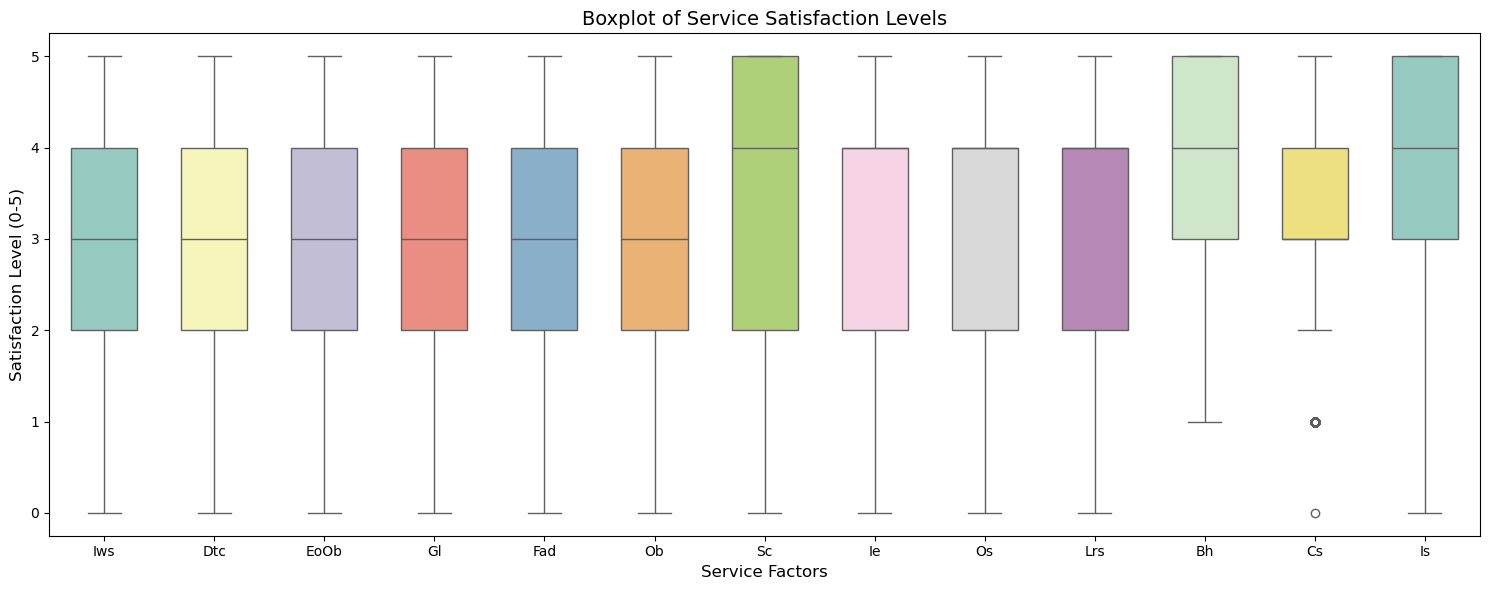

In [194]:
data_frame_copy_5 = data_frame.copy()
service_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service']
ar_index = []
for i in service_columns:
    a = i.split(' ')
    s = ''
    for j in a:
        s += j[0]
    ar_index.append(s)
data_frame_copy_5_abbr = data_frame_copy_5[service_columns].copy()
data_frame_copy_5_abbr.columns = ar_index
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_frame_copy_5_abbr, palette="Set3", width=0.6)
plt.title("Boxplot of Service Satisfaction Levels", fontsize=14)
plt.ylabel("Satisfaction Level (0-5)", fontsize=12)
plt.xlabel("Service Factors", fontsize=12)
plt.tight_layout()
plt.show()


## Sự tương quan giữa các đối tượng (Correlation between objects)

### Tỉ lệ hài lòng theo loại khách hàng và mục đích chuyến đi ( Influence of Customer type and Type of travel on Satisfaction )

,name,Tong,satisfaction,Percentage by Type (%)
0,Loyal Business,66114,0,29.382582
1,Loyal Personal,39986,0,89.896464
2,disloyal Business,23579,0,75.961661
3,disloyal Personal,201,0,84.079602
4,Loyal Business,66114,1,70.617418
5,Loyal Personal,39986,1,10.103536
6,disloyal Business,23579,1,24.038339
7,disloyal Personal,201,1,15.920398


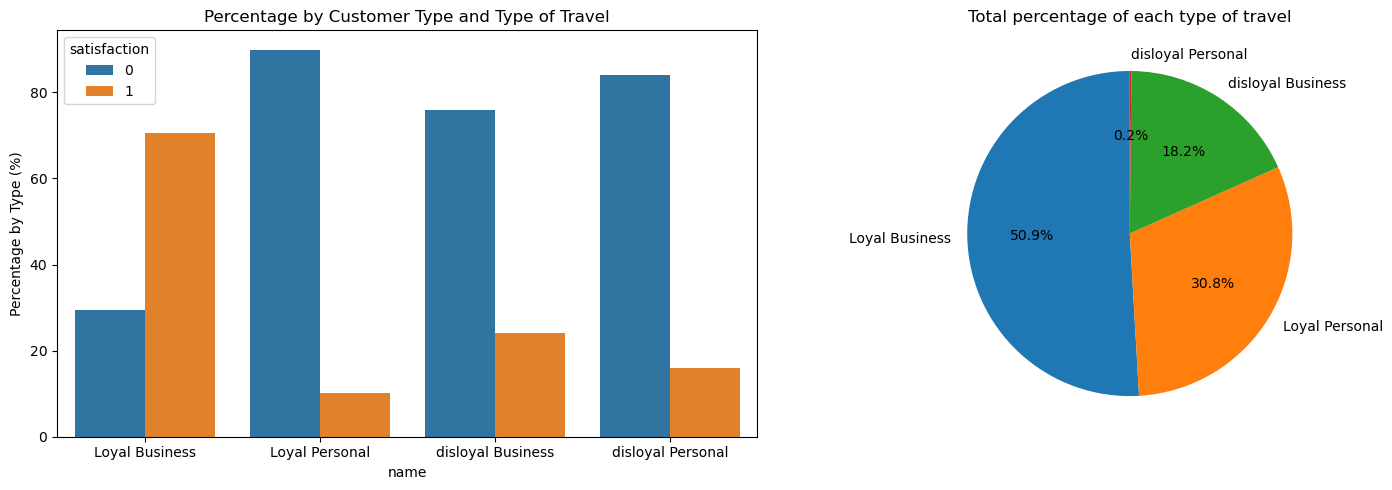

In [195]:
data_frame_copy_1 = data_frame.copy()
# fell satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_1['satisfaction'] = data_frame_copy_1['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
# create crosstab 
df_crosstab = pd.crosstab(
    index=[data_frame_copy_1['Customer Type'], data_frame_copy_1['Type of Travel']], 
    columns=data_frame_copy_1['satisfaction'],  
    margins=True,  
    margins_name="Tong"  
)
total_count = df_crosstab.iloc[-1, -1]
# calculator percentage satisfaction by customer type and type of travel
df_crosstab[[0, 1]] = df_crosstab[[0, 1]].div(df_crosstab["Tong"], axis=0) * 100
percent = df_crosstab.sort_index().drop(index="Tong")
percent_reset = percent.reset_index()
percent_reset['name'] = percent_reset['Customer Type'].str.split().str[0] + " " + percent_reset['Type of Travel'].str.split().str[0]
# reshape table wide into long 
percent_long = percent_reset.melt(  id_vars=["name","Tong"],
                                    value_vars=[0, 1],
                                    var_name="satisfaction", 
                                    value_name="Percentage by Type (%)")
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
# first plot
sns.barplot(x="name", y="Percentage by Type (%)", hue="satisfaction", data=percent_long, errorbar=None, edgecolor=None, ax=ax1)
ax1.set_title("Percentage by Customer Type and Type of Travel")
ax1.set_ylabel("Percentage by Type (%)")
# second plot
labels = percent_long[0:4]["name"]
sizes = percent_long[0:4]["Tong"]  
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
ax2.set_title("Total percentage of each type of travel")
plt.tight_layout()
percent_long

### Sự tương quan giữa các dịch vụ và sự hài lòng (Correlation between service and satisfaction)

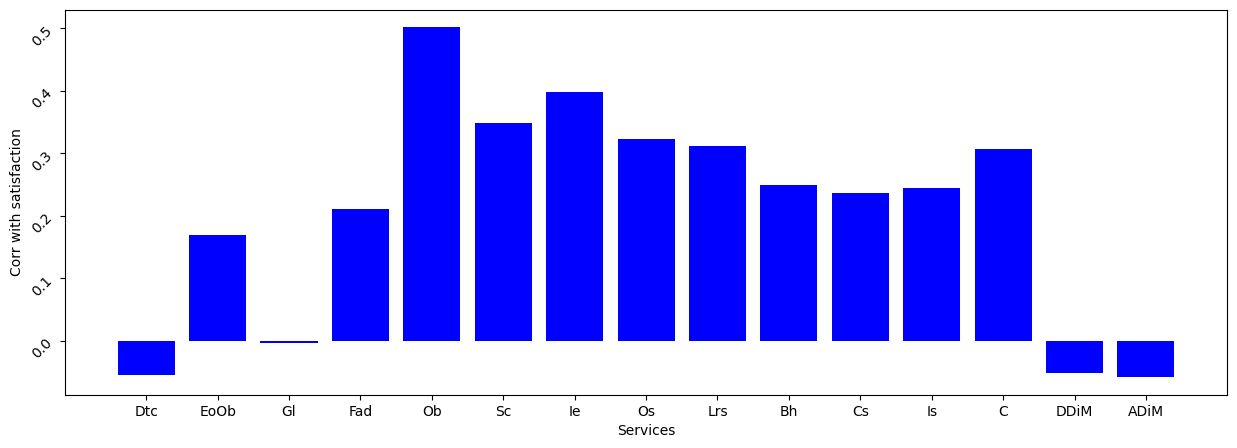

In [196]:
data_frame_copy_2 = data_frame.copy()
# fell satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_2['satisfaction'] = data_frame_copy_2['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
columns = list(data_frame.columns)[7:25]
data_col = data_frame_copy_2[columns].copy()
#create a correlation matrix
matrix = data_col.corr()
satisfaction_matrix = matrix['satisfaction'].drop('satisfaction')
# create index of services
ar_index = []
for i in satisfaction_matrix.index:
    a = i.split(' ')
    s = ''
    for j in a:
        s += j[0]
    ar_index.append(s)
# plot 
fig,ax = plt.subplots(figsize= (15,5))
ax.bar(ar_index , satisfaction_matrix.values, color = 'blue')
plt.xlabel('Services')
plt.ylabel('Corr with satisfaction')
plt.yticks(rotation = 45)
plt.show()

### Quan hệ giữa tuổi và độ dài chuyến bay (Relationship between Age and Flight Distance)

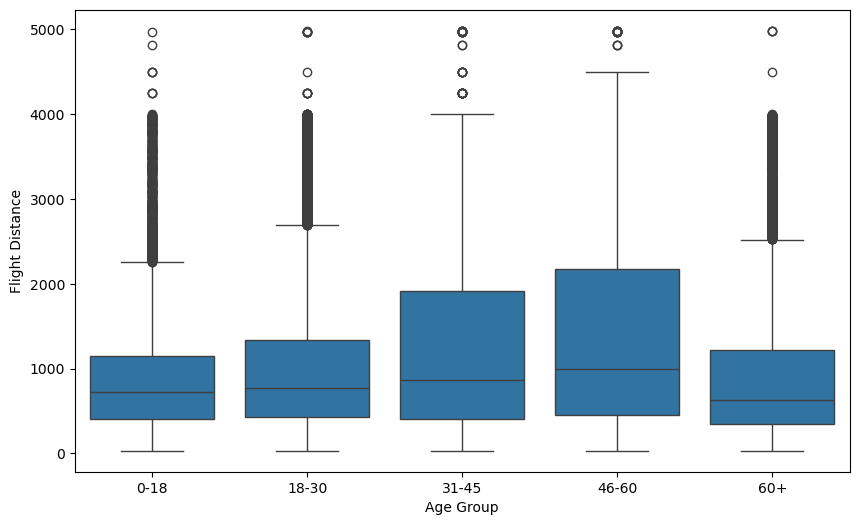

In [197]:
data_frame_copy_3 = data_frame.copy()
#index age
bins = [0, 18, 30, 45, 60, 100]  
labels = ['0-18','18-30', '31-45', '46-60', '60+']  
# cut age
data_frame_copy_3['Age Group'] = pd.cut(data_frame_copy_3['Age'], bins=bins, labels=labels)
data_frame_copy_3['Age Group'].value_counts()
# plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Flight Distance', data=data_frame_copy_3);

### Quan hệ giữa thời gian trễ khởi hành và thời gian trễ khi đến (Relationship between Departure Delay in Minutes and Arrival Delay in Minutes)

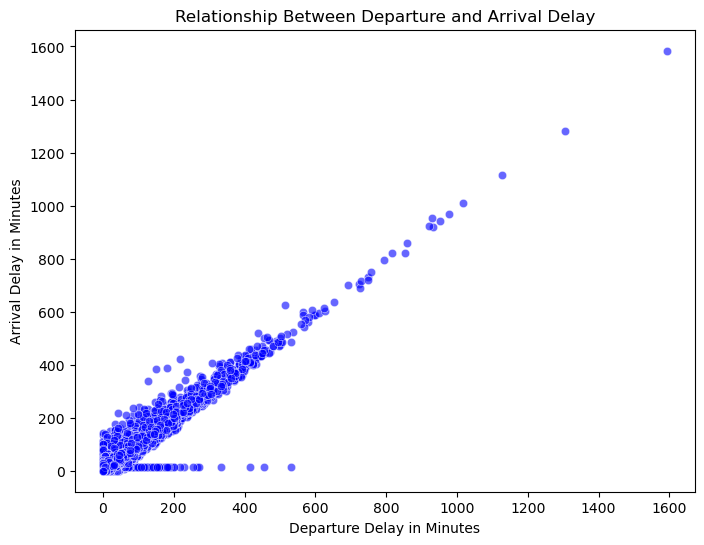

In [198]:
data_frame_copy_4 = data_frame.copy()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_frame_copy_4, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', alpha=0.6, color='blue')
plt.title('Relationship Between Departure and Arrival Delay')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.show()


### Tỉ lệ hài lòng theo loại vé (cần bổ xung)

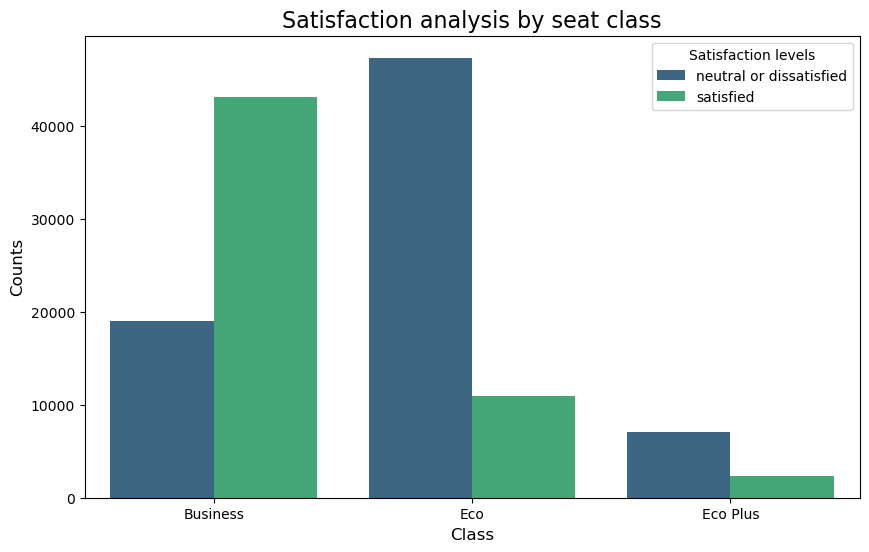

In [199]:
data_frame_copy_6 =data_frame.copy()
satisfaction_counts = data_frame_copy_6.groupby(["Class", "satisfaction"]).size().reset_index(name="Counts")
plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction_counts, x="Class", y="Counts", hue="satisfaction", palette="viridis")
plt.title("Satisfaction analysis by seat class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend(title="Satisfaction levels")
plt.show()
# cần chuyển qua tỉ lệ chứ đừng để count và thêm 1 biểu đồ tròn thể hiện % các loại vé (giống cái của Việt)


### Đánh giá về dịch vụ ăn uống , vị trí ngồi , sự sạch sẽ theo nhóm tuổi

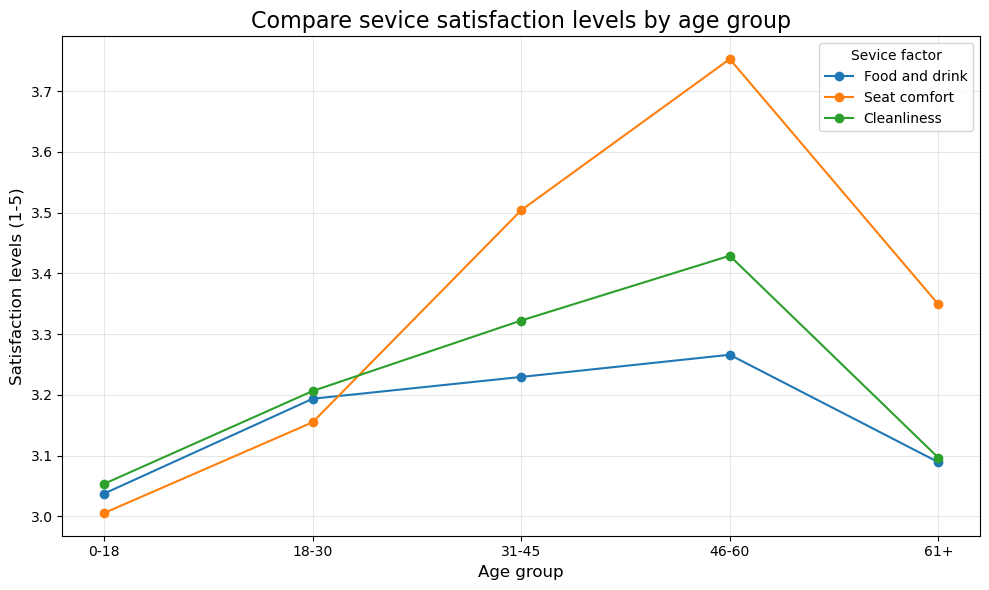

In [200]:
data_frame_copy_7 = data_frame.copy()
bins = [0, 18, 30, 45, 60, 100]   
labels = ['0-18','18-30', '31-45', '46-60', '61+'] 
data_frame_copy_7["Age Group"] = pd.cut(data_frame_copy_7["Age"], bins=bins, labels=labels)
service_columns = ["Food and drink", "Seat comfort", "Cleanliness"]
age_group_means = data_frame_copy_7.groupby("Age Group", observed=False)[service_columns].mean().reset_index()
plt.figure(figsize=(10, 6))
for column in service_columns:
    plt.plot(age_group_means["Age Group"], age_group_means[column], marker="o", label=column)
plt.title("Compare sevice satisfaction levels by age group", fontsize=16)
plt.xlabel("Age group", fontsize=12)
plt.ylabel("Satisfaction levels (1-5)", fontsize=12)
plt.legend(title="Sevice factor")
plt.grid(alpha=0.3)
plt.tight_layout()


### Tỉ lệ hài lòng về các dịch vụ theo loại vé (cần bổ xung)

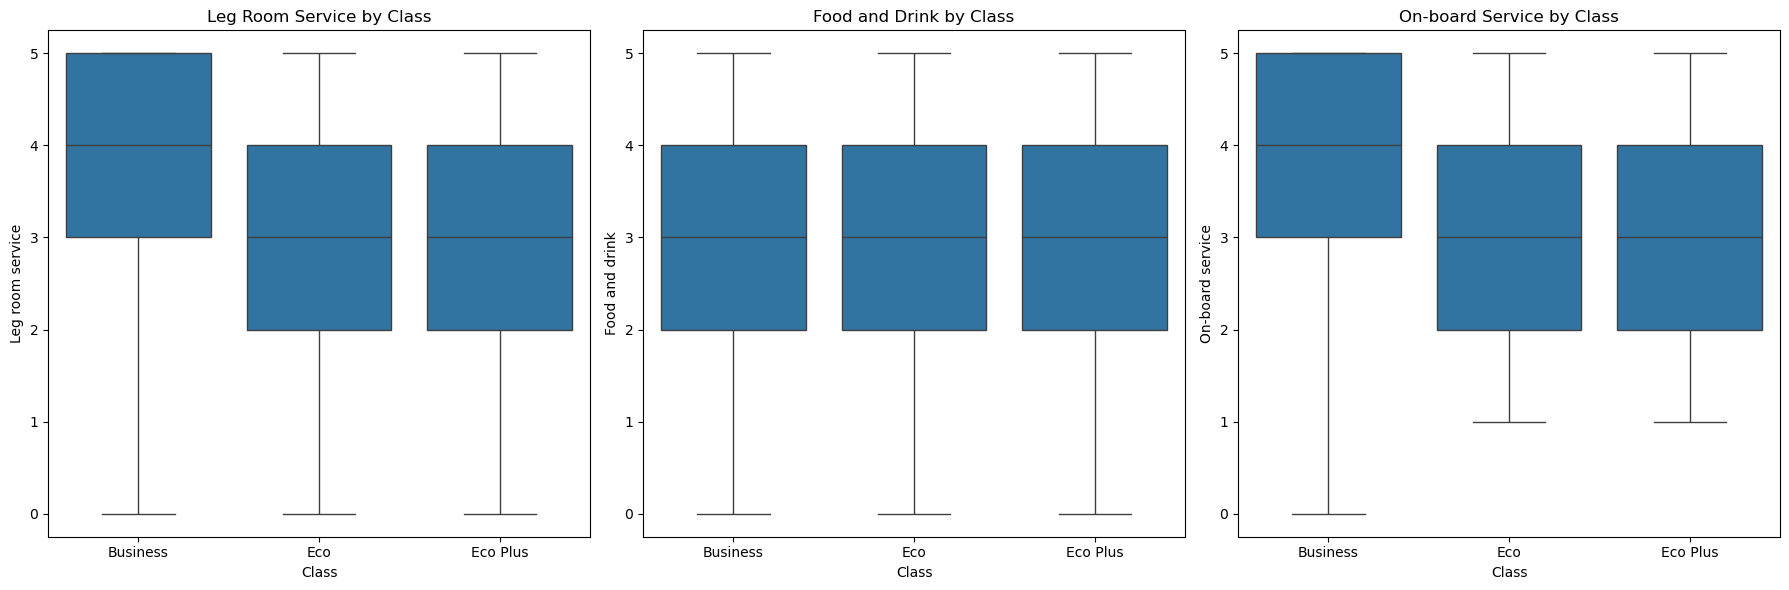

In [201]:
data_frame_copy_8 =data_frame.copy()
df = pd.DataFrame(data_frame_copy_8)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Class', y='Leg room service', data=df, ax=axes[0])
axes[0].set_title('Leg Room Service by Class')
sns.boxplot(x='Class', y='Food and drink', data=df, ax=axes[1])
axes[1].set_title('Food and Drink by Class')
sns.boxplot(x='Class', y='On-board service', data=df, ax=axes[2])
axes[2].set_title('On-board Service by Class')
plt.tight_layout()
plt.show()
### thêm Seat comfort, gate location, Leg room service

### Quan hệ giữa Inflight Service và các dịch vụ tích hợp (thay đổi)

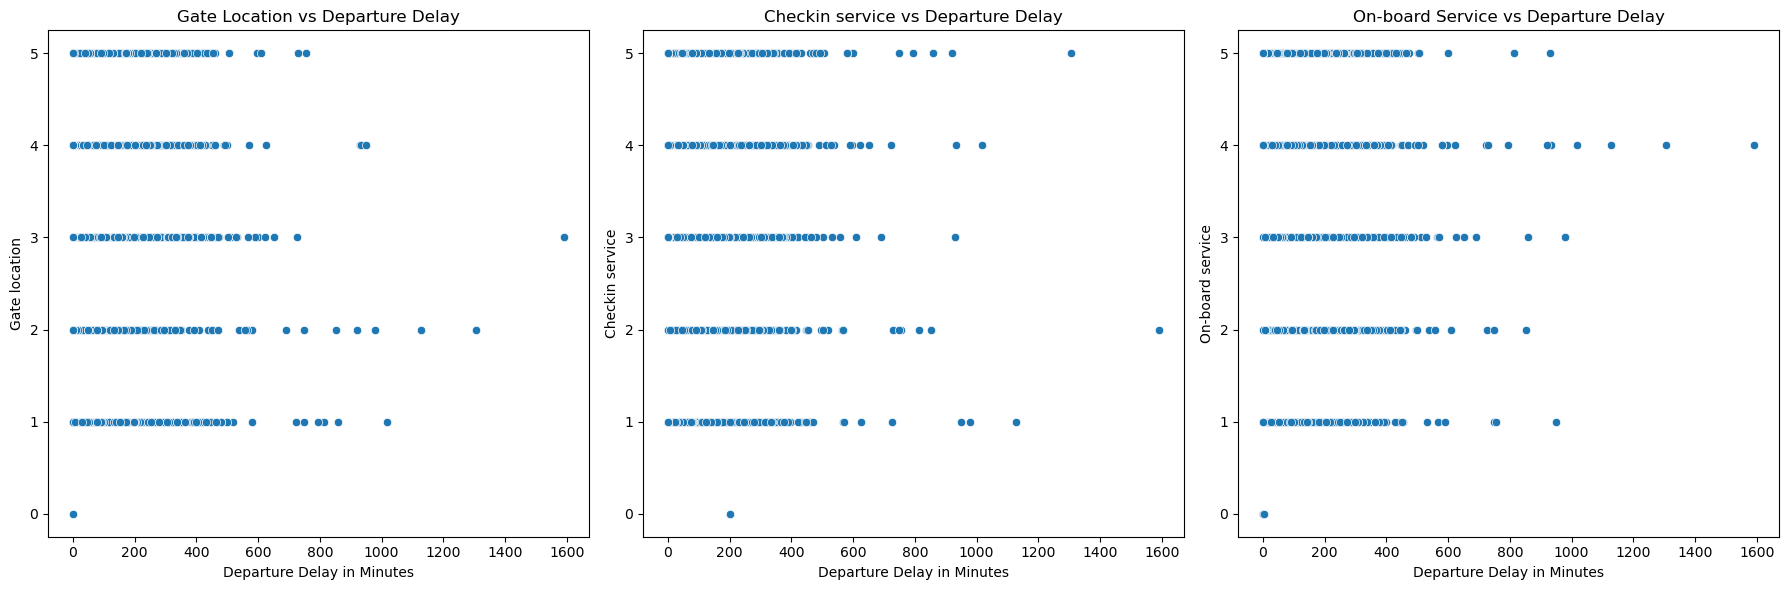

In [202]:
data_frame_copy_9 =data_frame.copy()
df = pd.DataFrame(data_frame_copy_9)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Departure Delay in Minutes', y='Gate location', data=df)
plt.title('Gate Location vs Departure Delay')
plt.subplot(1, 3, 2)
sns.scatterplot(x='Departure Delay in Minutes', y='Checkin service', data=df)
plt.title('Checkin service vs Departure Delay')
plt.subplot(1, 3, 3)
sns.scatterplot(x='Departure Delay in Minutes', y='On-board service', data=df)
plt.title('On-board Service vs Departure Delay')
plt.tight_layout()
plt.show()
### làm cái khác , thay bằng sự tương quan giữa inflight Setvice và wifi , ăn uống , chất lượng để chân.... (các trải nghiệm tổng quát)
### dùng corr 

### Tỉ lệ hài lòng theo giới tính và độ tuổi

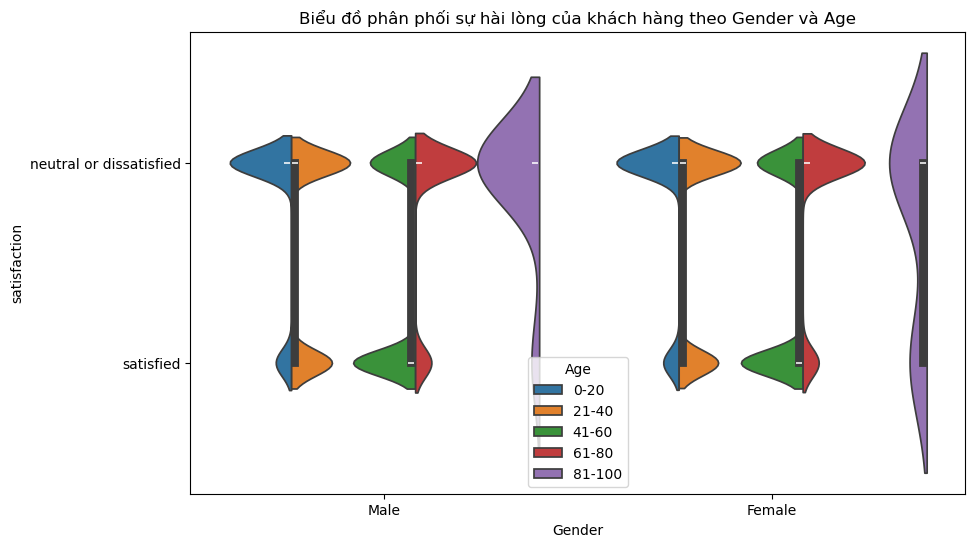

In [203]:
df_copy_1 = data_frame.copy()
bins = [0, 20, 40, 60, 80, 100] 
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df_copy_1['Age'] = pd.cut(df_copy_1['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='satisfaction', hue='Age', data=df_copy_1, split=True)
plt.title('Biểu đồ phân phối sự hài lòng của khách hàng theo Gender và Age')
plt.show()

### Nên xem lại 

C:\Users\abc\AppData\Local\Temp\ipykernel_9544\2438929472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[0], palette='Blues')
C:\Users\abc\AppData\Local\Temp\ipykernel_9544\2438929472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Arrival Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[1], palette='Reds')


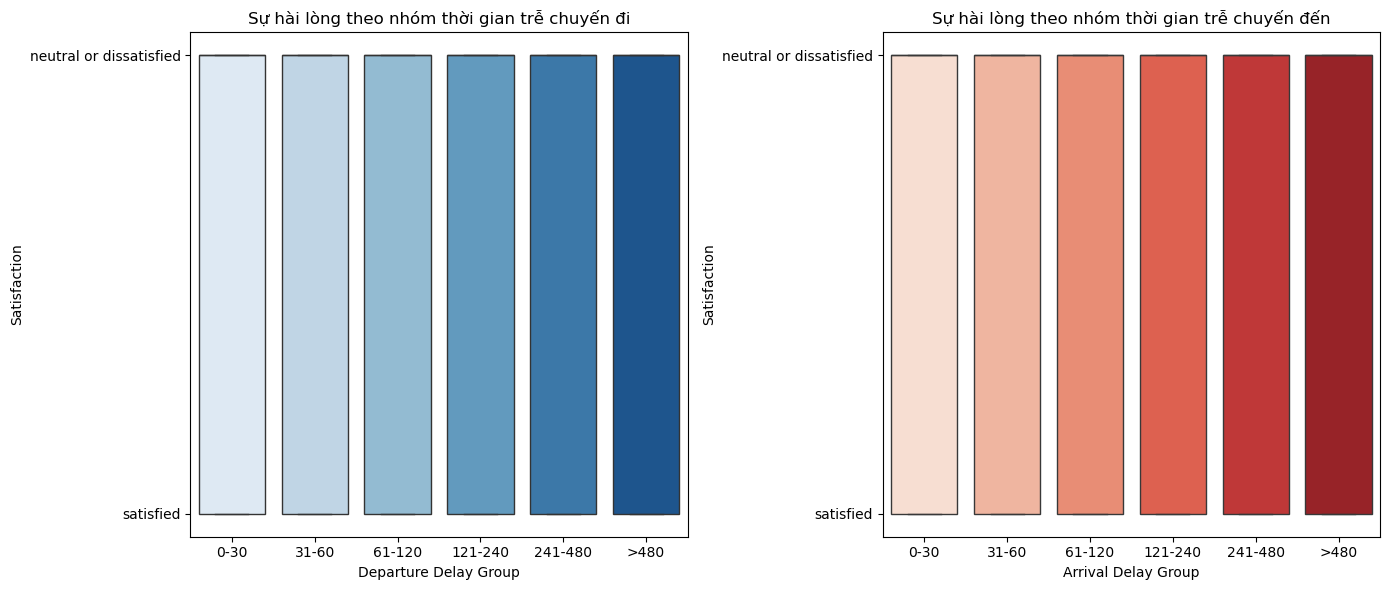

In [204]:
data_frame_copy_10 = data_frame.copy()
bins = [0, 30, 60, 120, 240, 480, 1000]
labels = ['0-30', '31-60', '61-120', '121-240', '241-480', '>480']
data_frame_copy_10['Departure Delay Group'] = pd.cut(data_frame_copy_10['Departure Delay in Minutes'], bins=bins, labels=labels)
data_frame_copy_10['Arrival Delay Group'] = pd.cut(data_frame_copy_10['Arrival Delay in Minutes'], bins=bins, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Departure Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[0], palette='Blues')
ax[0].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đi')
ax[0].set_xlabel('Departure Delay Group')
ax[0].set_ylabel('Satisfaction')

sns.boxplot(x='Arrival Delay Group', y='satisfaction', data=data_frame_copy_10, ax=ax[1], palette='Reds')
ax[1].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đến')
ax[1].set_xlabel('Arrival Delay Group')
ax[1].set_ylabel('Satisfaction')

plt.tight_layout()
plt.show()
### không hiểu 

# Preparing data

### Xử lý dữ liệu ngoại lai 

In [336]:
data_model = data_frame.copy()
data_model['satisfaction'] = data_model['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
# outline percentiles
max_flight_distance = data_model['Flight Distance'].quantile(0.99)
data_model = data_model[data_model['Flight Distance'] < max_flight_distance]
data_model['Flight Distance'] = data_model['Flight Distance'].astype(int)
# IQR
for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    Q1 = data_model[col].quantile(0.25)
    Q3 = data_model[col].quantile(0.75)
    IQR = Q3 - Q1
    max_delay = Q3 + 1.5 * IQR
    min_delay = Q1 - 1.5 * IQR
    data_model = data_model[(data_model[col] < max_delay) & (data_model[col] > min_delay)]
# Z-score Age 
mean = data_model['Age'].mean()
std = data_model['Age'].std()
max_z_score = mean + 3 * std
min_z_score = mean - 3 * std
data_model = data_model[(data_model['Age'] < max_z_score) & (data_model['Age'] > min_z_score)]


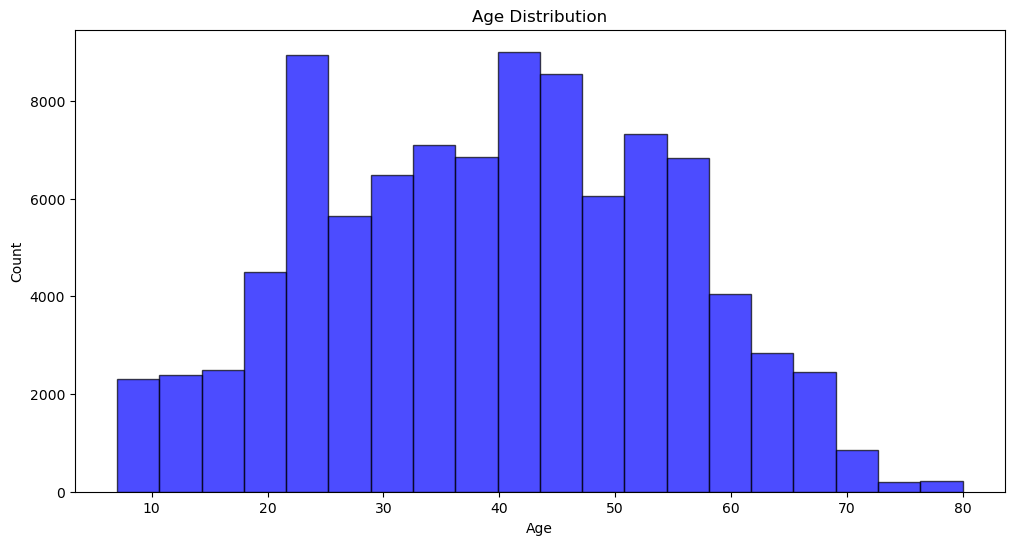

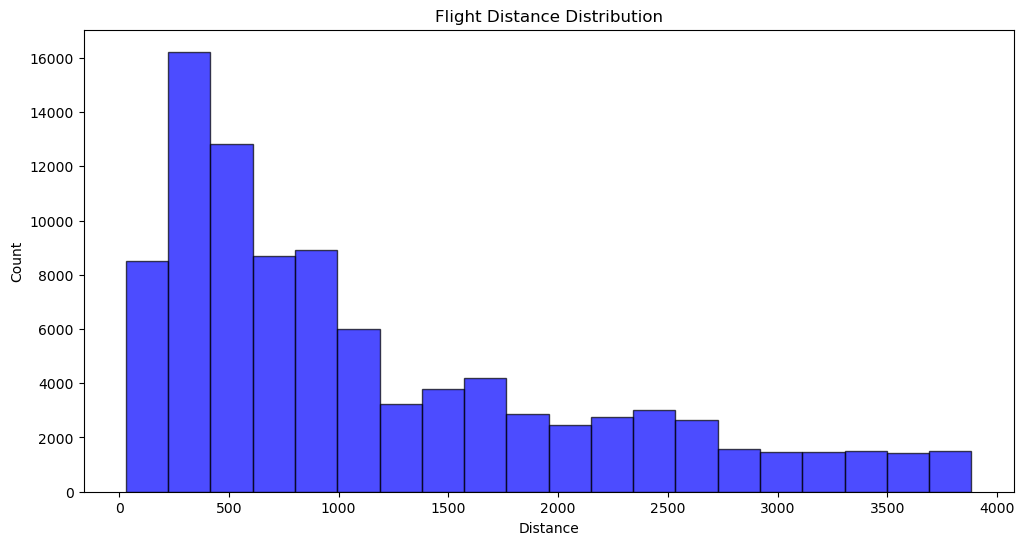

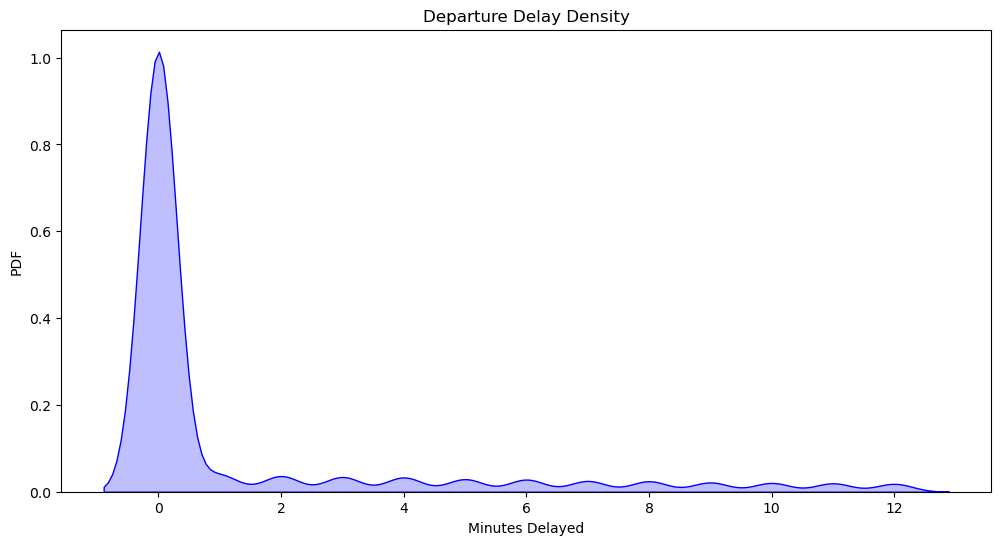

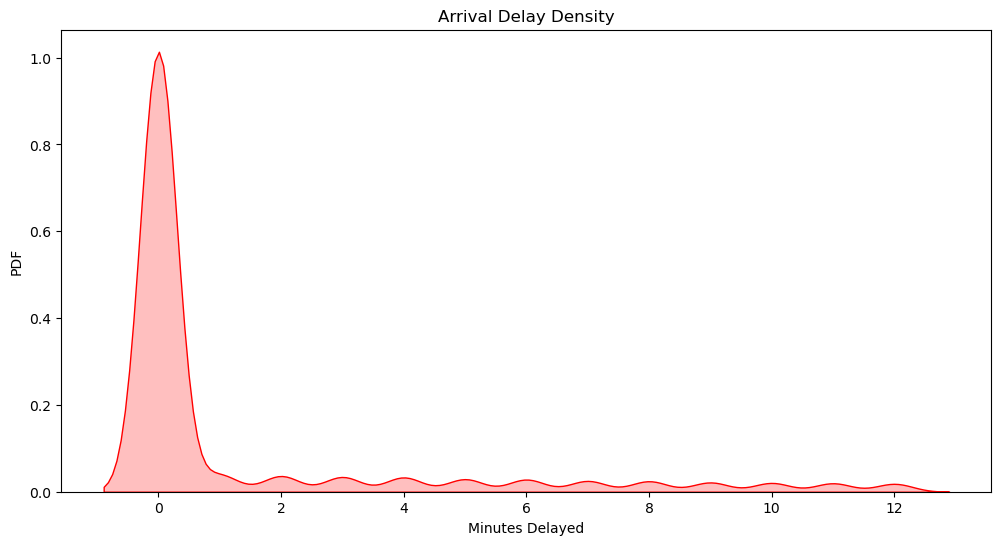

<Figure size 640x480 with 0 Axes>

In [337]:
# Histogram plot for Age
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_model['Age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()
# Histogram plot for Flight Distance
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_model['Flight Distance'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Flight Distance Distribution")
ax.set_xlabel("Distance")
ax.set_ylabel("Count")
plt.show()

# Line plot for Departure Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_model['Arrival Delay in Minutes'], fill=True, color='blue', ax=ax)
ax.set_title("Departure Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
plt.show()

# Line plot for Arrival Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_model['Arrival Delay in Minutes'], fill=True, color='red', ax=ax)
ax.set_title("Arrival Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
plt.show()
plt.tight_layout()
plt.show()

### One_hot Encoding

In [338]:
data_model.reset_index(drop=True, inplace=True)
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(data_model[['Gender', 'Customer Type', 'Type of Travel', 'Class']]).toarray()
feature_label = ohe.categories_
feature_label = [item for sublist in feature_label for item in sublist]
feature_data = pd.DataFrame(feature_array, columns=feature_label)
data_model = pd.concat([data_model, feature_data], axis=1)
data_model = data_model.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
data_model = data_model.astype(float)


In [342]:
data_model.dtypes

Age                                  float64
Flight Distance                      float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
satisfaction                         float64
Female                               float64
Male                                 float64
Loyal Customer                       float64
disloyal C

# Model Learning 

### Model satisfaction

In [362]:
# train model
X_model_1 = data_model.drop('satisfaction', axis=1)
y_model_1 = data_model['satisfaction']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_model_1, y_model_1, test_size=0.2, random_state=42)
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X_train_1, y_train_1) 
y_pred_1 = model_1.predict(X_test_1)

In [365]:
# dánh giá tỉ lệ dự đoán đúng 
precision = precision_score(y_test_1, y_pred_1, average='binary')
# đánh giá độ nhạy 
recall = recall_score(y_test_1, y_pred_1, average='binary')
## F1-score
f1 = f1_score(y_test_1, y_pred_1, average='binary')
print(f"Tỉ lệ dự đoán đúng : {precision}")
print(f"Độ nhạy : {recall}")
print(f"F1-score: {f1}")

Tỉ lệ dự đoán đúng : 0.9717263687552414
Độ nhạy : 0.9404057971014492
F1-score: 0.9558095687013906


In [ ]:
# trực quan model 

In [134]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = linear_model.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)
accuracy = accuracy_score(y_test, y_pred)
pre = recall_score(y_test, y_pred)
print("Score:", score)
print("MSE:", mse)
print("Accuracy:", accuracy)
print("Precision:", pre)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### model Arrival Delay in Minutes

In [87]:
# Chọn các đặc trưng và nhãn
X1 = data_frame[['Departure Delay in Minutes', 'Flight Distance', 'Type of Travel', 'Class']]
y1 = data_frame['Arrival Delay in Minutes']

# One-Hot Encoding cho các cột phân loại
X1 = pd.get_dummies(X1, columns=['Type of Travel', 'Class'])

# Chia tập dữ liệu
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X1_train, y1_train)

# Dự đoán và đánh giá
y1_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y1_test, y1_pred))
print("R2 Score:", r2_score(y1_test, y1_pred))
df_1 = pd.DataFrame({'y_test': y1_test, 'y_pred': y1_pred})
df_1


NameError: name 'RandomForestRegressor' is not defined